<a href="https://colab.research.google.com/github/zestypratyush/Transfer_learning/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras. models import Sequential

In [ ]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
      hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape = IMAGE_SHAPE+(3,))
])

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


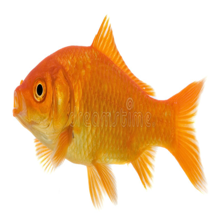

In [ ]:
goldfish = Image.open('/content/gdrive/My Drive/goldfish.jpg').resize(IMAGE_SHAPE)
goldfish

In [ ]:
goldfish = np.array(goldfish)/255.0
goldfish

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

In [ ]:
goldfish[np.newaxis,...].shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict(goldfish[np.newaxis,...])
result.shape

(1, 1001)

In [ ]:
predicted_label_index = np.argmax(result)

In [ ]:
predicted_label_index

819

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin= dataset_url, cache_dir='.',untar=True)

228827136/228813984 [==============================] - 5s 0us/step


In [ ]:
 data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/8684108_a85764b22d_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4657801292_73bef15031.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18238604119_a5689980ee_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8689302100_be76a16ccc_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/6994925894_030e157fe0.jpg')]

In [ ]:
image_cnt = len(list(data_dir.glob('*/*.jpg')))
image_cnt

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/8241471746_5d81fdd3c0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/319298955_0c72bd36bf.jpg'),
 PosixPath('datasets/flower_photos/roses/4414135084_1ac7e6cd54.jpg'),
 PosixPath('datasets/flower_photos/roses/14494590921_3bb1dc7b88_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5529341024_0c35f2657d.jpg')]

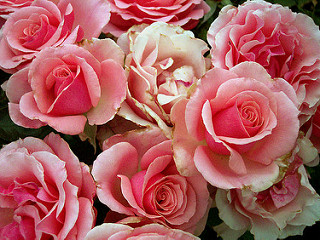

In [ ]:
Image.open(str(roses[3]))

In [ ]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [ ]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 56,  56,  62],
        [127, 131, 150],
        [195, 189, 206],
        ...,
        [240, 218, 223],
        [235, 208, 217],
        [239, 210, 219]],

       [[ 54,  54,  60],
        [126, 130, 149],
        [198, 192, 209],
        ...,
        [230, 211, 214],
        [233, 212, 214],
        [248, 224, 226]],

       [[ 53,  53,  59],
        [124, 128, 147],
        [202, 196, 213],
        ...,
        [235, 220, 218],
        [228, 210, 209],
        [231, 210, 208]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 219, 220],
        [251, 219, 220],
        [251, 219, 220]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [246, 215, 216],
        [248, 216, 217],
        [248, 216, 217]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [245, 214, 215],
        [246, 214, 215],
        [246, 214, 215]]

In [ ]:
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [ ]:
X,y = [],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X[0]/255

array([[[0.27843137, 0.28235294, 0.31764706],
        [0.67058824, 0.65882353, 0.72941176],
        [0.65098039, 0.62745098, 0.68627451],
        ...,
        [0.95294118, 0.8627451 , 0.88235294],
        [0.93333333, 0.83921569, 0.8627451 ],
        [0.93333333, 0.82352941, 0.85882353]],

       [[0.27058824, 0.2745098 , 0.30980392],
        [0.6745098 , 0.66666667, 0.7372549 ],
        [0.67058824, 0.64313725, 0.70588235],
        ...,
        [0.90588235, 0.82352941, 0.83529412],
        [0.90588235, 0.83137255, 0.83921569],
        [0.95294118, 0.8627451 , 0.87058824]],

       [[0.26666667, 0.27058824, 0.30588235],
        [0.68627451, 0.6745098 , 0.74509804],
        [0.69019608, 0.65490196, 0.72156863],
        ...,
        [0.90588235, 0.82352941, 0.83529412],
        [0.90980392, 0.84705882, 0.84313725],
        [0.90588235, 0.82745098, 0.82352941]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state =0)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.45882353, 0.6       , 0.6627451 ],
        [0.45882353, 0.6       , 0.66666667],
        [0.4627451 , 0.60392157, 0.6627451 ],
        ...,
        [0.32941176, 0.44313725, 0.54901961],
        [0.32941176, 0.44313725, 0.54901961],
        [0.32941176, 0.44313725, 0.54901961]],

       [[0.44705882, 0.60392157, 0.6627451 ],
        [0.44705882, 0.60392157, 0.6627451 ],
        [0.45098039, 0.6       , 0.65882353],
        ...,
        [0.3372549 , 0.45098039, 0.55686275],
        [0.3372549 , 0.45490196, 0.55686275],
        [0.3372549 , 0.45490196, 0.55294118]],

       [[0.42745098, 0.6       , 0.65882353],
        [0.42745098, 0.60392157, 0.65490196],
        [0.43137255, 0.60392157, 0.65490196],
        ...,
        [0.34901961, 0.46666667, 0.56470588],
        [0.35294118, 0.46666667, 0.56470588],
        [0.35686275, 0.4627451 , 0.56470588]],

       ...,

       [[0.00784314, 0.29411765, 0.20392157],
        [0.06666667, 0.40784314, 0.29019608],
        [0.08627451, 0

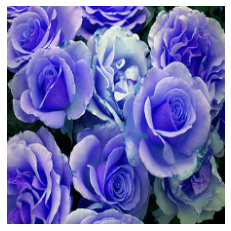

In [ ]:
plt.axis('off')
plt.imshow(X[3])

In [ ]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted,axis=1)
predicted

array([722, 592, 620])

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3),trainable = False
)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
86/86 [==============================] - 77s 852ms/step - loss: 0.8373 - accuracy: 0.6882
Epoch 2/5
86/86 [==============================] - 75s 875ms/step - loss: 0.4259 - accuracy: 0.8441
Epoch 3/5
86/86 [==============================] - 74s 855ms/step - loss: 0.3308 - accuracy: 0.8917
Epoch 4/5
86/86 [==============================] - 73s 852ms/step - loss: 0.2787 - accuracy: 0.9121
Epoch 5/5
86/86 [==============================] - 75s 873ms/step - loss: 0.2405 - accuracy: 0.9284


In [ ]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 28s 892ms/step - loss: 0.3476 - accuracy: 0.8736


[0.34763839840888977, 0.8736383318901062]